# Leer los datos.

In [27]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo CSV
df = pd.read_csv('../data/ofertas_relampago.csv')

# Asegurar que la columna OFFER_START_DATE sea interpretada como una fecha (solo formato de fecha)
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'], format='%Y-%m-%d')

# Asegurar que las columnas OFFER_START_DTTM y OFFER_FINISH_DTTM sean interpretadas como fechas con horas
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'], format='%Y-%m-%d %H:%M:%S%z')
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'], format='%Y-%m-%d %H:%M:%S%z')

# Mostrar los tipos de datos para confirmar que las conversiones fueron exitosas
print(df.dtypes)

# Mostrar las primeras 3 filas del DataFrame como una vista previa
df.head(3)

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


# Exploración de calida de datos.

In [28]:
# Resumen de datos faltantes
missing_data = df.isnull().sum()

# Total de registros
total_rows = len(df)

# Crear un resumen de valores faltantes con el porcentaje
# Incluye el nombre de la columna, número y porcentaje de valores faltantes, y tipo de dato
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data,
    'Missing_Percentage': (missing_data / total_rows) * 100,
    'Data_Type': df.dtypes
}).reset_index(drop=True)

# Separar el análisis por tipo de variable
# Identificar columnas numéricas, categóricas y de tipo datetime
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

# Resumen por tipo de variable
# Agregar un tipo lógico basado en el tipo de dato de cada columna
missing_summary['Variable_Type'] = missing_summary['Column'].apply(
    lambda x: (
        'Numerical' if x in numerical_columns else
        'Categorical' if x in categorical_columns else
        'Datetime' if x in datetime_columns else
        'Other'
    )
)

# Mostrar información clave sobre el DataFrame
print("Dimension de datos:")
print(df.shape)
print('--------')
# Mostrar valores únicos en la columna 'ORIGIN'
print("Valores distintos en variable 'ORIGIN':")
print(df["ORIGIN"].value_counts())
print('--------')
# Mostrar el resumen de valores faltantes y tipos de variables
print("Resumen de Valores Faltantes y Tipos de Variables:")
missing_summary

Dimension de datos:
(48746, 13)
--------
Valores distintos en variable 'ORIGIN':
ORIGIN
A    11316
Name: count, dtype: int64
--------
Resumen de Valores Faltantes y Tipos de Variables:


,Column,Missing_Count,Missing_Percentage,Data_Type,Variable_Type
0,OFFER_START_DATE,0,0.000000,datetime64[ns],Datetime
1,OFFER_START_DTTM,0,0.000000,"datetime64[ns, UTC]",Datetime
2,OFFER_FINISH_DTTM,0,0.000000,"datetime64[ns, UTC]",Datetime
3,OFFER_TYPE,0,0.000000,object,Categorical
4,INVOLVED_STOCK,0,0.000000,int64,Numerical
5,REMAINING_STOCK_AFTER_END,0,0.000000,int64,Numerical
6,SOLD_AMOUNT,24167,49.577401,float64,Numerical
7,SOLD_QUANTITY,24167,49.577401,float64,Numerical
8,ORIGIN,37430,76.785788,object,Categorical
9,SHIPPING_PAYMENT_TYPE,0,0.000000,object,Categorical


Se decide eliminar la variable 'ORIGIN' dado que el 76% de sus valores son nulos, y el restante 'A', dado que no agrega mayor información.

Resumen estadístico de variables con alto % de faltantes:
        SOLD_AMOUNT  SOLD_QUANTITY
count  24579.000000   24579.000000
mean      51.208898      10.851052
std      175.254414      45.475305
min        0.280000       1.000000
25%        5.730000       1.000000
50%       12.420000       3.000000
75%       30.925000       6.000000
max     4836.570000    1646.000000

Distribución de valores no nulos por columna:
SOLD_AMOUNT - 24579 valores no nulos
SOLD_QUANTITY - 24579 valores no nulos


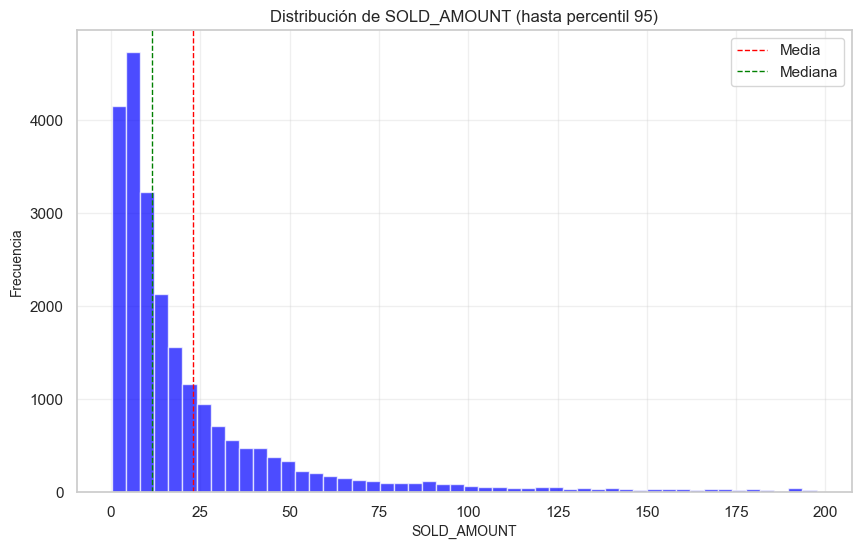

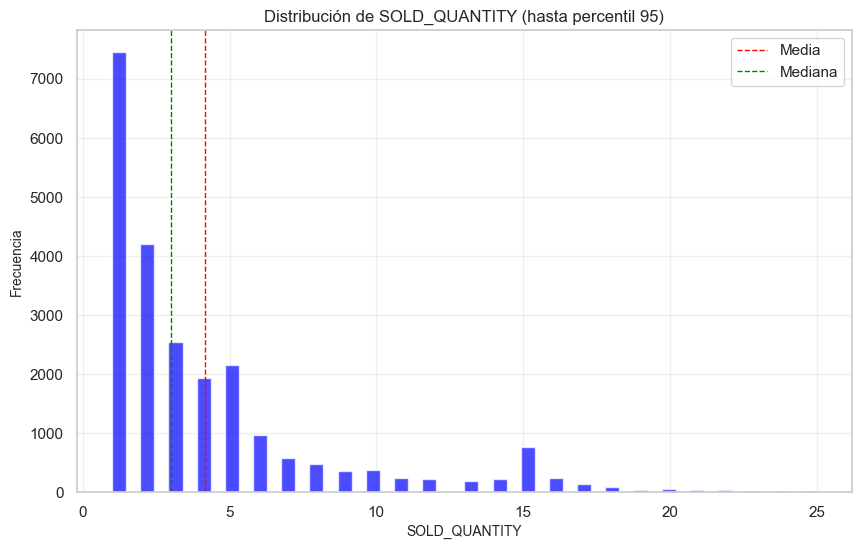

In [29]:
# Eliminar la variable 'ORIGIN'
df.drop(columns=['ORIGIN'], inplace=True)

# Explorar las variables con alto % de faltantes
high_missing_columns = ['SOLD_AMOUNT', 'SOLD_QUANTITY']

# Resumen estadístico para estas variables
print("Resumen estadístico de variables con alto % de faltantes:")
print(df[high_missing_columns].describe())

# Distribución de valores no nulos
print("\nDistribución de valores no nulos por columna:")
for col in high_missing_columns:
    print(f"{col} - {df[col].notnull().sum()} valores no nulos")

# Visualizar distribuciones de las columnas con alto % de faltantes
import matplotlib.pyplot as plt

for col in high_missing_columns:
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    
    # Obtener el percentil 95 para limitar el eje x
    p95 = df[col].quantile(0.95)
    
    # Crear histograma solo con datos hasta el percentil 95
    plt.hist(df[col][df[col] <= p95], bins=50, color='blue', alpha=0.7)
    
    plt.title(f'Distribución de {col} (hasta percentil 95)', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
    # Añadir líneas verticales para la media y mediana
    plt.axvline(df[col][df[col] <= p95].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    plt.axvline(df[col][df[col] <= p95].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [30]:
# Identificar valores nulos en ambas columnas
missing_sold_amount = df['SOLD_AMOUNT'].isnull()
missing_sold_quantity = df['SOLD_QUANTITY'].isnull()

# Valores faltantes compartidos
shared_missing = (missing_sold_amount & missing_sold_quantity).sum()

# Valores faltantes exclusivos de cada columna
missing_only_sold_amount = (missing_sold_amount & ~missing_sold_quantity).sum()
missing_only_sold_quantity = (~missing_sold_amount & missing_sold_quantity).sum()

# Mostrar resultados
print("Valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:", shared_missing)
print("Valores faltantes solo en SOLD_AMOUNT:", missing_only_sold_amount)
print("Valores faltantes solo en SOLD_QUANTITY:", missing_only_sold_quantity)

# Filtrar filas donde ambas columnas tienen valores faltantes
shared_missing_rows = df[missing_sold_amount & missing_sold_quantity]

# Mostrar las primeras 5 filas de las que comparten valores faltantes
print("Top 5 filas con valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:")
shared_missing_rows.head(5)

Valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY: 24167
Valores faltantes solo en SOLD_AMOUNT: 0
Valores faltantes solo en SOLD_QUANTITY: 0
Top 5 filas con valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS


Se asumirá que los valores faltantes en `SOLD_AMOUNT` y `SOLD_QUANTITY` serán imputados como ceros. Esto se justifica porque no existen valores mínimos registrados que indiquen esta condición y, al imputar con otra medida de tendencia central, se podría introducir ruido en el análisis.

In [31]:
# Imputar valores faltantes con ceros en SOLD_AMOUNT y SOLD_QUANTITY
df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

print("Valores faltantes imputados con ceros en SOLD_AMOUNT y SOLD_QUANTITY.")

Valores faltantes imputados con ceros en SOLD_AMOUNT y SOLD_QUANTITY.


In [32]:
# Separar columnas por tipo de dato
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

# Resumen para columnas numéricas
numerical_summary = df[numerical_columns].agg(['mean', 'median', 'std', 'min', 'max'])

# Resumen para columnas categóricas
categorical_summary = df[categorical_columns].nunique().to_frame(name='Unique_Count')

# Resumen para columnas de fecha
datetime_summary = pd.DataFrame({
    'Min_Date': df[datetime_columns].min(),
    'Max_Date': df[datetime_columns].max()
})

# Mostrar los resúmenes
print("Resumen de columnas numéricas:")
print(numerical_summary)

print("\nResumen de columnas categóricas:")
print(categorical_summary)

print("\nResumen de columnas de fecha:")
print(datetime_summary)

# Eliminar la variable 'OFFER_TYPE'
df.drop(columns=['OFFER_TYPE'], inplace=True)

Resumen de columnas numéricas:
        INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY
mean         35.007508                  30.565216    25.820857       5.471382
median       10.000000                   8.000000     1.000000       1.000000
std         206.761058                 195.813806   127.051542      32.743776
min           1.000000                -192.000000     0.000000       0.000000
max        9000.000000                8635.000000  4836.570000    1646.000000

Resumen de columnas categóricas:
                       Unique_Count
OFFER_TYPE                        1
SHIPPING_PAYMENT_TYPE             2
DOM_DOMAIN_AGG1                  36
VERTICAL                          9
DOMAIN_ID                      1266

Resumen de columnas de fecha:
                                    Min_Date                   Max_Date
OFFER_START_DATE         2021-06-01 00:00:00        2021-07-31 00:00:00
OFFER_START_DTTM   2021-06-01 07:00:00+00:00  2021-07-31 19:00:00+00:00
OFFE

### Observaciones Clave

1. **Columnas Numéricas:**
   - `SOLD_AMOUNT` y `SOLD_QUANTITY` tienen valores muy concentrados en los percentiles bajos (mediana de 1.0), pero con máximos extremadamente altos (4836.57 y 1646.0), lo que sugiere posibles valores atípicos.
   - `REMAINING_STOCK_AFTER_END` incluye valores negativos (mínimo de -192), que podrían indicar devoluciones o errores en el registro.

2. **Columnas Categóricas:**
   - `OFFER_TYPE` no aporta variabilidad (1 único valor) y será eliminada.
   - `DOMAIN_ID` tiene alta granularidad con 1266 valores únicos, lo que podría ser útil para segmentación.

3. **Columnas de Fecha:**
   - Los datos cubren un rango temporal del 1 de junio al 1 de agosto de 2021, lo cual incluye 2 meses completos de ofertas.

Estas observaciones guían las decisiones de limpieza y exploración adicionales.

In [33]:
print("Variables restantes y sus tipo de dato")
print(df.dtypes)

Variables restantes y sus tipo de dato
OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object


# Exploración de variables numericas.

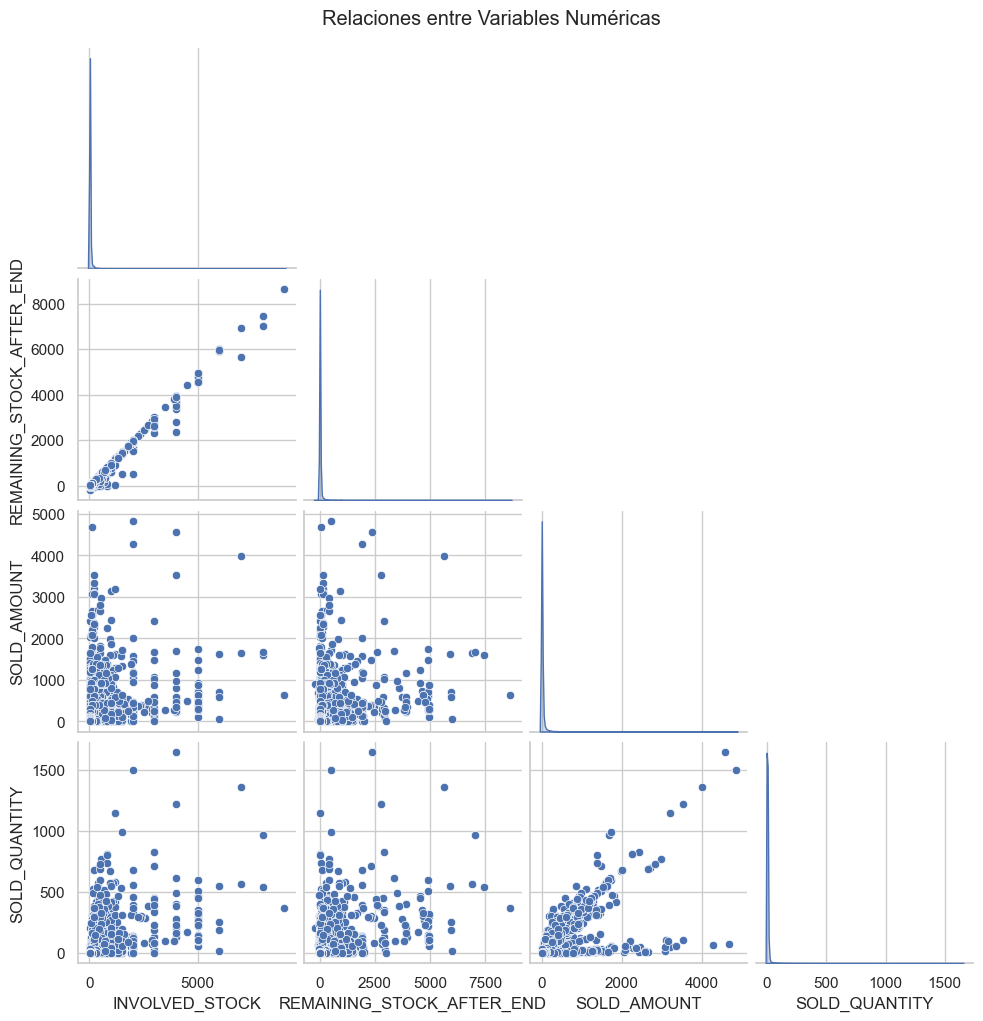

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_columns = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']

# Crear el pairplot
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[numerical_columns], diag_kind="kde", corner=True)

# Agregar título general al gráfico
pairplot.fig.suptitle("Relaciones entre Variables Numéricas", y=1.02)

# Mostrar el gráfico
plt.show()

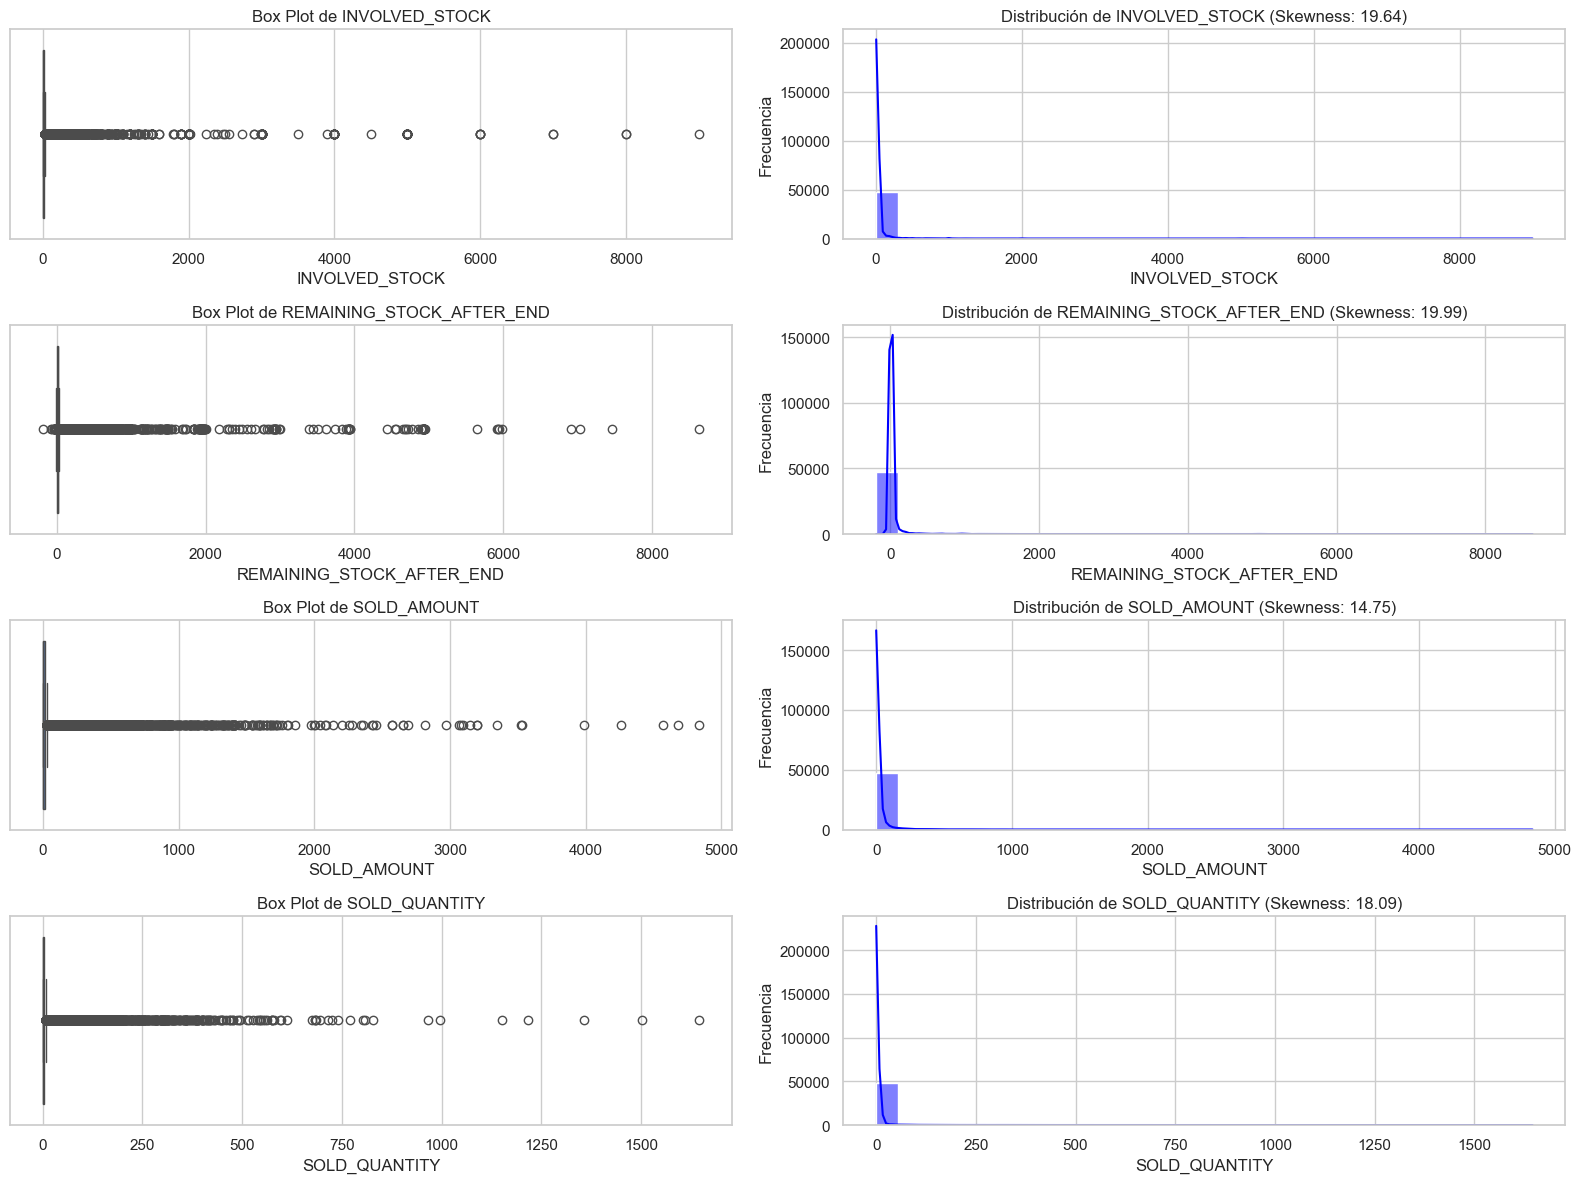

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crear gráficos para las variables relevantes
variables = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']

for i, var in enumerate(variables, 1):
    # Box plot
    plt.subplot(4, 2, 2*i-1)
    sns.boxplot(x=df[var])
    plt.title(f"Box Plot de {var}")
    plt.xlabel(var)

    # Distribución
    plt.subplot(4, 2, 2*i)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    skewness = skew(df[var].dropna())  # Cálculo del skewness
    plt.title(f"Distribución de {var} (Skewness: {skewness:.2f})")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

# Ajustar el diseño
plt.tight_layout()
plt.show()

Porcentaje de valores atípicos por variable:
INVOLVED_STOCK: 9.12%
REMAINING_STOCK_AFTER_END: 8.52%
SOLD_AMOUNT: 12.39%
SOLD_QUANTITY: 9.75%


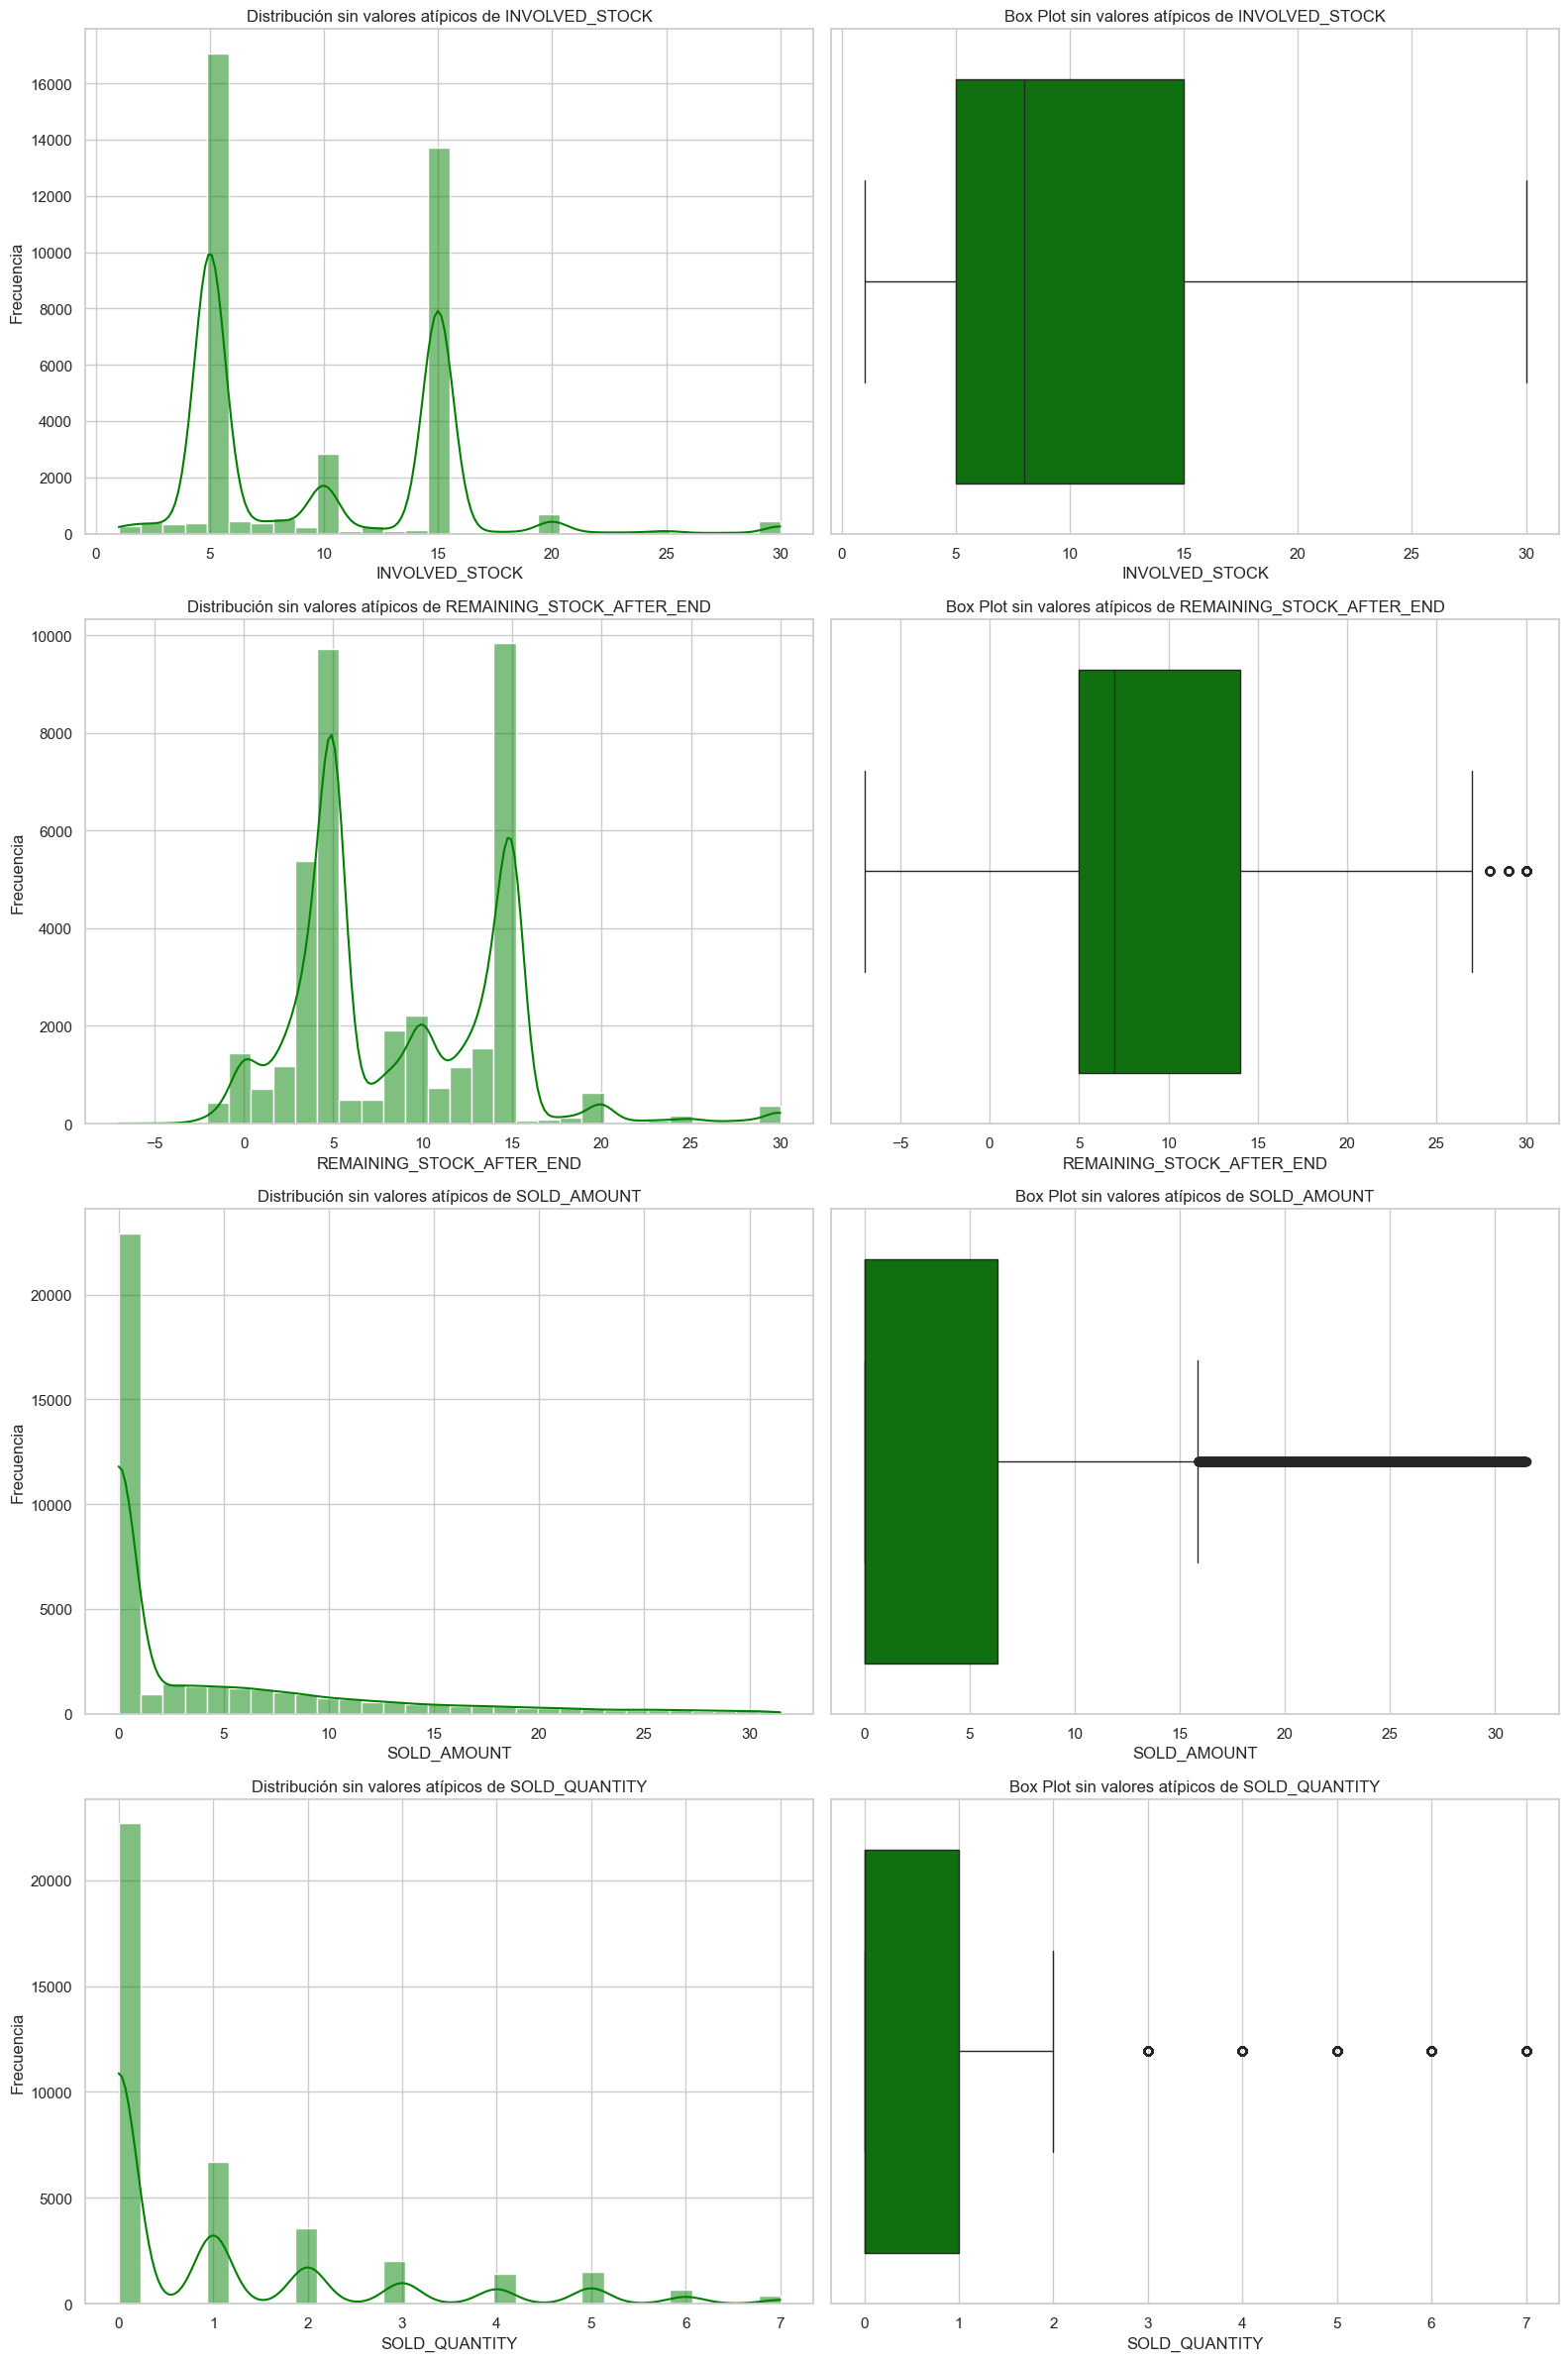

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular valores atípicos y su porcentaje
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar valores atípicos
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    
    return outliers, outlier_percentage, lower_bound, upper_bound

# Identificar y eliminar atípicos para cada variable numérica
filtered_df = df.copy()  # Crear un DataFrame filtrado
outlier_info = {}

for var in ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']:
    outliers, percentage, lower_bound, upper_bound = identify_outliers(df, var)
    outlier_info[var] = percentage
    # Eliminar valores atípicos
    filtered_df = filtered_df[(filtered_df[var] >= lower_bound) & (filtered_df[var] <= upper_bound)]

# Mostrar el porcentaje de valores atípicos
print("Porcentaje de valores atípicos por variable:")
for var, percentage in outlier_info.items():
    print(f"{var}: {percentage:.2f}%")

# Graficar nuevamente sin valores atípicos: Distribuciones y Box Plots
plt.figure(figsize=(16, 24))

variables = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']

for i, var in enumerate(variables):
    # Histograma y KDE
    plt.subplot(len(variables), 2, 2 * i + 1)
    sns.histplot(filtered_df[var], kde=True, bins=30, color='green')
    plt.title(f"Distribución sin valores atípicos de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    
    # Box Plot
    plt.subplot(len(variables), 2, 2 * i + 2)
    sns.boxplot(x=filtered_df[var], color='green')
    plt.title(f"Box Plot sin valores atípicos de {var}")
    plt.xlabel(var)

plt.tight_layout()
plt.show()

### Observaciones sobre las Variables Numéricas

1. **Valores Atípicos:**
   - El porcentaje de valores atípicos varía entre 8.52% y 12.39% según la variable:
     - `INVOLVED_STOCK`: 9.12%
     - `REMAINING_STOCK_AFTER_END`: 8.52%
     - `SOLD_AMOUNT`: 12.39%
     - `SOLD_QUANTITY`: 9.75%
   - La eliminación de valores atípicos permitió reducir la dispersión y enfocar el análisis en los datos centrales.

2. **Distribuciones sin Valores Atípicos:**
   - **`INVOLVED_STOCK` y `REMAINING_STOCK_AFTER_END`:**
     - Muestran distribuciones multimodales, lo que podría reflejar diferentes tipos de ofertas o comportamientos.
   - **`SOLD_AMOUNT` y `SOLD_QUANTITY`:**
     - Ambas variables están sesgadas hacia valores bajos, con una alta concentración cerca de 0 y 1, respectivamente.

Cantidad de registros con REMAINING_STOCK_AFTER_END negativo: 1273
Porcentaje respecto al total: 2.61%

Resumen estadístico de registros con valores negativos:
                    OFFER_START_DATE  INVOLVED_STOCK  \
count                           1273     1273.000000   
mean   2021-07-06 22:00:05.655930880       15.874313   
min              2021-06-01 00:00:00        1.000000   
25%              2021-06-23 00:00:00        5.000000   
50%              2021-07-09 00:00:00        8.000000   
75%              2021-07-22 00:00:00       15.000000   
max              2021-07-31 00:00:00      810.000000   
std                              NaN       45.063459   

       REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY  
count                1273.000000  1273.000000    1273.000000  
mean                   -2.998429    47.377031      17.961508  
min                  -192.000000     0.000000       0.000000  
25%                    -3.000000    11.320000       6.000000  
50%                 

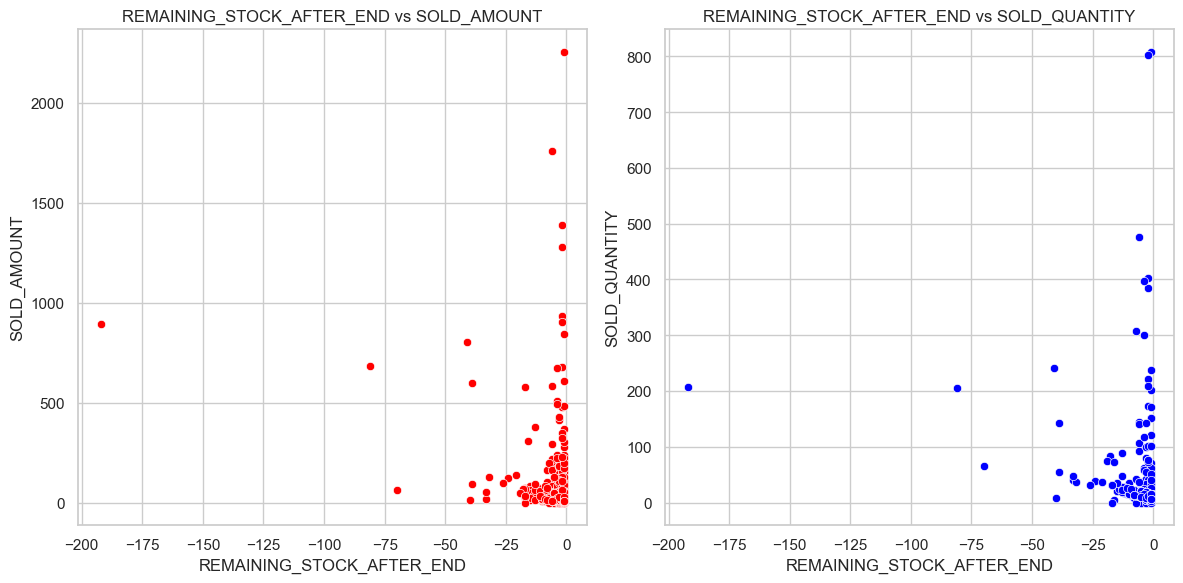


Frecuencias por VERTICAL:
VERTICAL
HOME & INDUSTRY    0.269442
BEAUTY & HEALTH    0.233307
APP & SPORTS       0.168892
CE                 0.145326
CPG                0.084053
ACC                0.068342
T & B              0.028280
OTHERS             0.002357
Name: proportion, dtype: float64

Frecuencias por SHIPPING_PAYMENT_TYPE:
SHIPPING_PAYMENT_TYPE
none             0.85546
free_shipping    0.14454
Name: proportion, dtype: float64


In [37]:
# Filtrar valores negativos en REMAINING_STOCK_AFTER_END
negative_stock_df = df[df['REMAINING_STOCK_AFTER_END'] < 0]

# Mostrar la cantidad de registros con valores negativos
num_negative = len(negative_stock_df)
print(f"Cantidad de registros con REMAINING_STOCK_AFTER_END negativo: {num_negative}")

# Calcular el porcentaje respecto al total
percentage_negative = (num_negative / len(df)) * 100
print(f"Porcentaje respecto al total: {percentage_negative:.2f}%")

# Resumen estadístico de registros con valores negativos
print("\nResumen estadístico de registros con valores negativos:")
print(negative_stock_df.describe())

# Relación con SOLD_AMOUNT y SOLD_QUANTITY
plt.figure(figsize=(12, 6))

# Scatter plot: REMAINING_STOCK_AFTER_END vs SOLD_AMOUNT
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=negative_stock_df['REMAINING_STOCK_AFTER_END'],
    y=negative_stock_df['SOLD_AMOUNT'],
    color="red"
)
plt.title("REMAINING_STOCK_AFTER_END vs SOLD_AMOUNT")
plt.xlabel("REMAINING_STOCK_AFTER_END")
plt.ylabel("SOLD_AMOUNT")

# Scatter plot: REMAINING_STOCK_AFTER_END vs SOLD_QUANTITY
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=negative_stock_df['REMAINING_STOCK_AFTER_END'],
    y=negative_stock_df['SOLD_QUANTITY'],
    color="blue"
)
plt.title("REMAINING_STOCK_AFTER_END vs SOLD_QUANTITY")
plt.xlabel("REMAINING_STOCK_AFTER_END")
plt.ylabel("SOLD_QUANTITY")

plt.tight_layout()
plt.show()

# Frecuencias de VERTICAL y SHIPPING_PAYMENT_TYPE en registros negativos
print("\nFrecuencias por VERTICAL:")
print(negative_stock_df['VERTICAL'].value_counts(normalize=True))

print("\nFrecuencias por SHIPPING_PAYMENT_TYPE:")
print(negative_stock_df['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True))

### Análisis de Registros con `REMAINING_STOCK_AFTER_END` Negativo

1. **Cantidad y Proporción:**
   - Se identificaron **1273 registros** con valores negativos en `REMAINING_STOCK_AFTER_END`, lo que representa el **2.61%** del total de los datos.
   - Estos registros podrían reflejar casos de **sobresventas** que potencialmente llevan a incumplimientos.

2. **Resumen Estadístico:**
   - El promedio de `REMAINING_STOCK_AFTER_END` es **-2.99**, con un rango desde **-192** hasta **-1**, indicando que la mayoría de los valores negativos son pequeños, pero existen algunos casos extremos.
   - `SOLD_AMOUNT` y `SOLD_QUANTITY` muestran valores elevados en algunos casos (máximos de **2255.46** y **808**, respectivamente), lo que podría correlacionarse con altos niveles de venta durante sobresventas.

3. **Distribución por Categorías:**
   - **`VERTICAL`:**
     - Los segmentos más afectados son `HOME & INDUSTRY` (**26.9%**) y `BEAUTY & HEALTH` (**23.3%**), sugiriendo que ciertos tipos de productos son más propensos a sobresventas.
   - **`SHIPPING_PAYMENT_TYPE`:**
     - La mayoría de los casos negativos (**85.5%**) ocurren en transacciones con `none` como tipo de pago de envío, lo que podría estar relacionado con restricciones logísticas o de inventario.

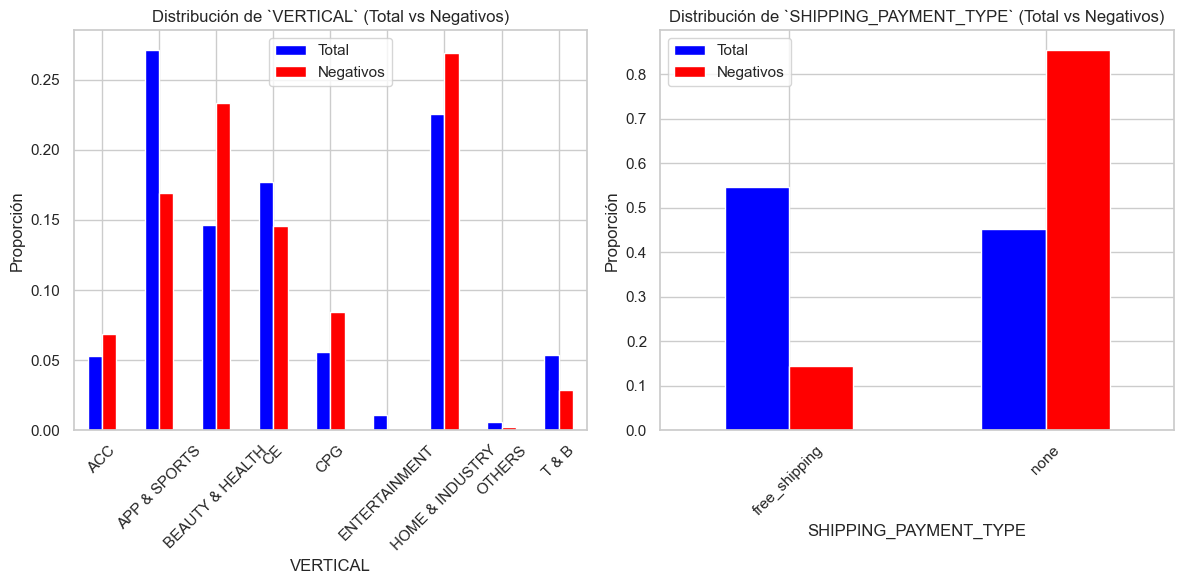

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular proporciones totales
total_vertical = df['VERTICAL'].value_counts(normalize=True)
total_shipping = df['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True)

# Calcular proporciones para valores negativos
negative_vertical = negative_stock_df['VERTICAL'].value_counts(normalize=True)
negative_shipping = negative_stock_df['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True)

# Crear un DataFrame para facilitar la comparación
vertical_comparison = pd.DataFrame({
    'Total': total_vertical,
    'Negativos': negative_vertical
}).fillna(0)

shipping_comparison = pd.DataFrame({
    'Total': total_shipping,
    'Negativos': negative_shipping
}).fillna(0)

# Plot: Comparación de `VERTICAL`
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
vertical_comparison.plot(kind='bar', ax=plt.gca(), color=['blue', 'red'])
plt.title("Distribución de `VERTICAL` (Total vs Negativos)")
plt.ylabel("Proporción")
plt.xlabel("VERTICAL")
plt.xticks(rotation=45)
plt.legend(["Total", "Negativos"])

# Plot: Comparación de `SHIPPING_PAYMENT_TYPE`
plt.subplot(1, 2, 2)
shipping_comparison.plot(kind='bar', ax=plt.gca(), color=['blue', 'red'])
plt.title("Distribución de `SHIPPING_PAYMENT_TYPE` (Total vs Negativos)")
plt.ylabel("Proporción")
plt.xlabel("SHIPPING_PAYMENT_TYPE")
plt.xticks(rotation=45)
plt.legend(["Total", "Negativos"])

plt.tight_layout()
plt.show()

### Observaciones de las Distribuciones

1. **Distribución de `VERTICAL`:**
   - Los segmentos **`HOME & INDUSTRY`** y **`BEAUTY & HEALTH`** están sobrerrepresentados en los casos negativos, indicando mayor propensión a sobresventas.
   - Otros segmentos como **`APP & SPORTS`** y **`CE`** muestran ligeras variaciones, pero no son tan significativos.

2. **Distribución de `SHIPPING_PAYMENT_TYPE`:**
   - **`none`** domina con más del **85%** de los casos negativos, mientras que su proporción total es menor.
   - **`free_shipping`** está subrepresentado en los casos negativos, lo que podría reflejar una mejor gestión logística.

### Conclusión
- Las sobresventas parecen estar influenciadas tanto por el tipo de producto (e.g., `HOME & INDUSTRY`, `BEAUTY & HEALTH`) como por el método de envío (`none`), indicando áreas clave para mejorar la gestión de inventario.

# Exploración variables de tiempo.

Resumen estadístico de la variable 'aging':
count    48746.000000
mean         5.708344
std          2.113096
min          0.000000
25%          6.000000
50%          6.000556
75%          6.004444
max        104.752500
Name: aging, dtype: float64


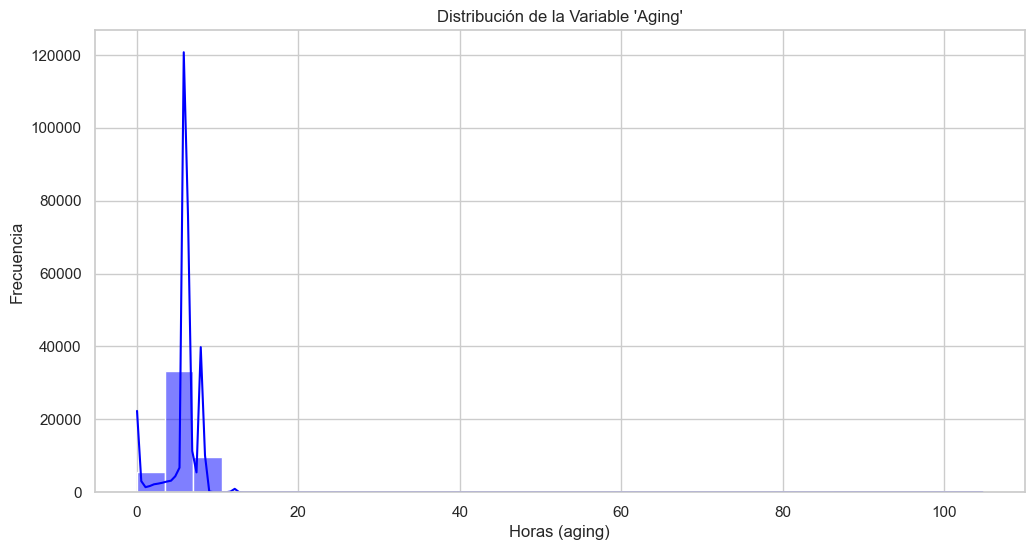

Cantidad de casos con 'aging' fuera de los límites esperados: 1


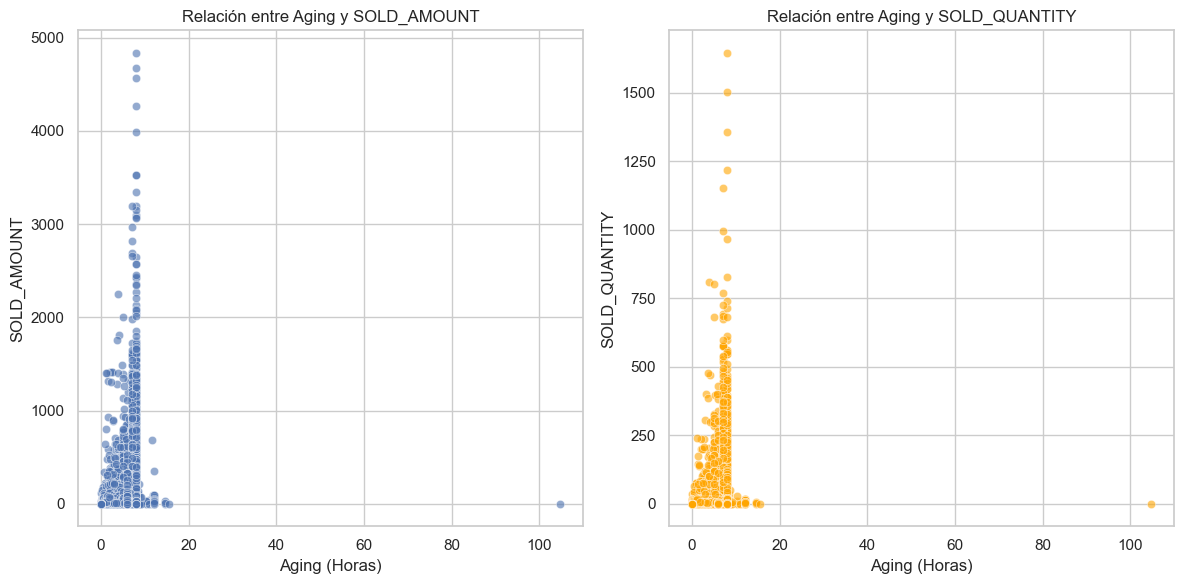

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la variable 'aging'
df['aging'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600  # Convertir a horas

# Verificar estadísticas básicas de 'aging'
print("Resumen estadístico de la variable 'aging':")
print(df['aging'].describe())

# Distribución de 'aging'
plt.figure(figsize=(12, 6))
sns.histplot(df['aging'], kde=True, bins=30, color='blue')
plt.title("Distribución de la Variable 'Aging'")
plt.xlabel("Horas (aging)")
plt.ylabel("Frecuencia")
plt.show()

# Identificar casos con 'aging' fuera de los límites esperados
outliers = df[(df['aging'] < 0) | (df['aging'] > 72)]  # Suponiendo que una oferta no debería durar más de 3 días
print(f"Cantidad de casos con 'aging' fuera de los límites esperados: {len(outliers)}")

# Analizar la relación entre 'aging' y otras métricas clave (e.g., SOLD_AMOUNT, SOLD_QUANTITY)
plt.figure(figsize=(12, 6))

# Scatter plot: aging vs SOLD_AMOUNT
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['aging'], y=df['SOLD_AMOUNT'], alpha=0.6)
plt.title("Relación entre Aging y SOLD_AMOUNT")
plt.xlabel("Aging (Horas)")
plt.ylabel("SOLD_AMOUNT")

# Scatter plot: aging vs SOLD_QUANTITY
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['aging'], y=df['SOLD_QUANTITY'], alpha=0.6, color="orange")
plt.title("Relación entre Aging y SOLD_QUANTITY")
plt.xlabel("Aging (Horas)")
plt.ylabel("SOLD_QUANTITY")

plt.tight_layout()
plt.show()

### Resumen de la Variable `aging`

1. **Estadísticas Principales:**
   - Promedio: **5.71 horas**, con una desviación estándar de **2.11 horas**.
   - La mayoría de las ofertas tienen una duración cercana a **6 horas** (percentiles 25, 50 y 75).
   - Duración mínima: **0 horas**, y máxima: **104.75 horas** (más de 4 días).

2. **Observación Clave:**
   - Aunque la mayoría de las ofertas tienen duraciones consistentes, existen valores extremos (e.g., ofertas que duran más de 72 horas).

In [40]:
df[(df['aging'] < 0) | (df['aging'] > 72)] 

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,aging
42018,2021-06-05,2021-06-05 13:00:00+00:00,2021-06-09 21:45:09+00:00,5,5,0.0,0.0,none,APPAREL ACCESORIES,APP & SPORTS,MLM-SLEEPING_MASKS,104.7525


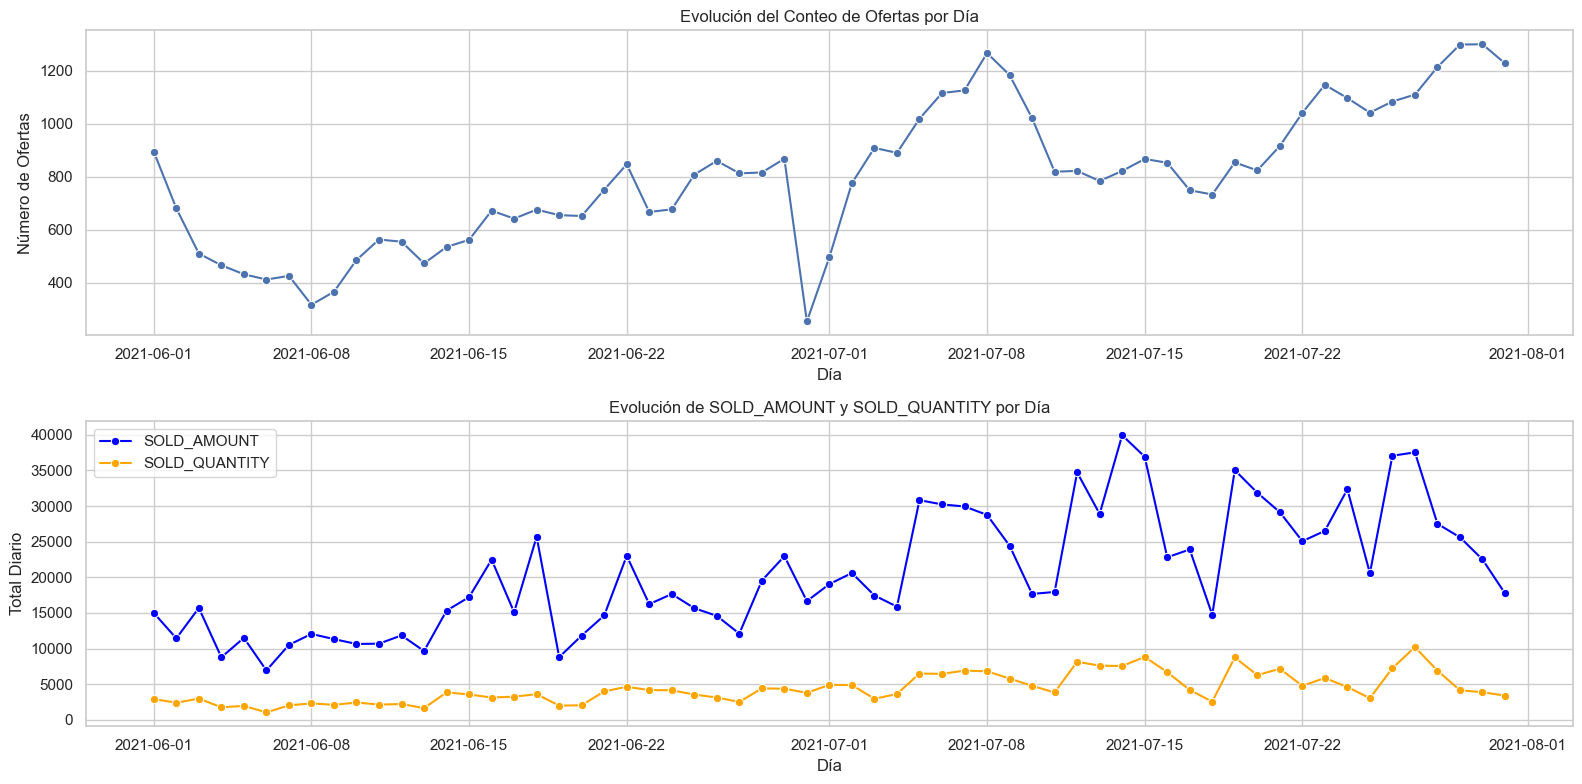

In [41]:
# Crear columna 'day' a partir de OFFER_START_DATE
df['day'] = df['OFFER_START_DATE'].dt.date

# Calcular conteo de ofertas por día
offers_per_day = df.groupby('day').size().reset_index(name='offer_count')

# Evolución de SOLD_AMOUNT y SOLD_QUANTITY por día
amount_quantity_per_day = df.groupby('day')[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index()

# Graficar la evolución de las ofertas y las métricas
plt.figure(figsize=(16, 8))

# Ofertas por día
plt.subplot(2, 1, 1)
sns.lineplot(data=offers_per_day, x='day', y='offer_count', marker='o')
plt.title("Evolución del Conteo de Ofertas por Día")
plt.xlabel("Día")
plt.ylabel("Número de Ofertas")

# Evolución de SOLD_AMOUNT y SOLD_QUANTITY
plt.subplot(2, 1, 2)
sns.lineplot(data=amount_quantity_per_day, x='day', y='SOLD_AMOUNT', label='SOLD_AMOUNT', marker='o', color='blue')
sns.lineplot(data=amount_quantity_per_day, x='day', y='SOLD_QUANTITY', label='SOLD_QUANTITY', marker='o', color='orange')
plt.title("Evolución de SOLD_AMOUNT y SOLD_QUANTITY por Día")
plt.xlabel("Día")
plt.ylabel("Total Diario")
plt.legend()

plt.tight_layout()
plt.show()

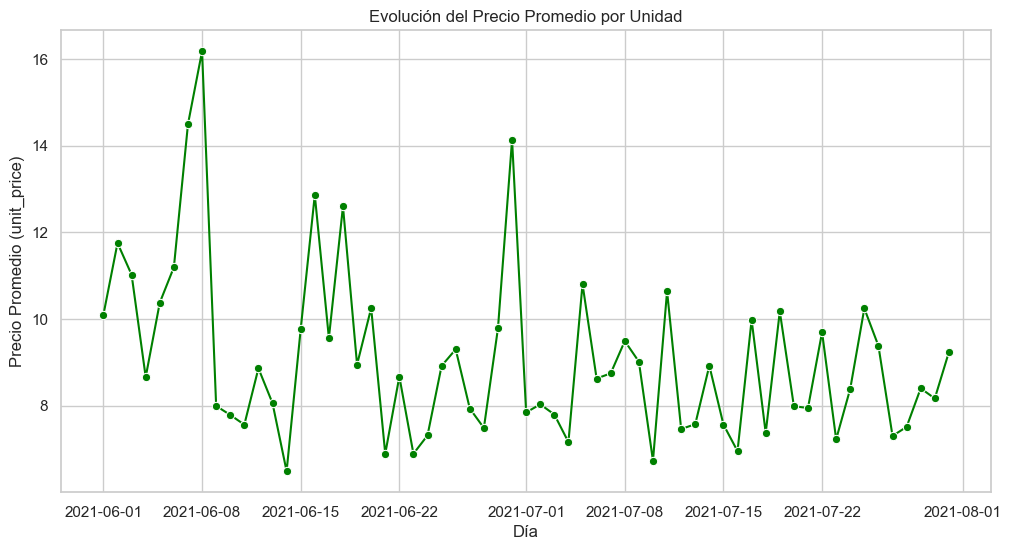

In [42]:
# Evitar división por cero
df['unit_price'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY'].replace(0, np.nan)

# Calcular el precio promedio por día
unit_price_per_day = df.groupby('day')['unit_price'].mean().reset_index()

# Graficar la evolución del precio promedio por unidad
plt.figure(figsize=(12, 6))
sns.lineplot(data=unit_price_per_day, x='day', y='unit_price', marker='o', color='green')
plt.title("Evolución del Precio Promedio por Unidad")
plt.xlabel("Día")
plt.ylabel("Precio Promedio (unit_price)")
plt.show()

### Observaciones de los Gráficos

1. **Evolución del Conteo de Ofertas por Día:**
   - El número de ofertas muestra una caída inicial en la primera semana de junio, seguida de un crecimiento sostenido desde mediados de junio hasta finales de julio.
   - Este patrón sugiere un ajuste inicial en la oferta y una recuperación progresiva con un aumento en la actividad.

2. **Evolución de `SOLD_AMOUNT` y `SOLD_QUANTITY`:**
   - **`SOLD_AMOUNT`** es más volátil y muestra picos significativos, indicando días específicos con promociones o productos de mayor valor.
   - **`SOLD_QUANTITY`** es más estable, lo que sugiere que los cambios en el monto vendido están más relacionados con productos más caros que con un aumento en las unidades vendidas.

3. **Relación entre Ofertas y Ventas:**
   - A pesar del aumento en el número de ofertas, los picos en `SOLD_AMOUNT` no siempre coinciden directamente, lo que indica que no todas las ofertas generan un impacto significativo en las ventas.

### Conclusión
- El aumento del número de ofertas impulsa el volumen general de ventas, pero los días con altos valores en `SOLD_AMOUNT` parecen depender de estrategias específicas, como promociones o productos premium.
- La estabilidad de `SOLD_QUANTITY` refleja un límite constante en la cantidad promedio vendida por oferta.

# Exploración variables categóricas.

In [43]:
print("Variables restantes y sus tipo de dato")
print(df.dtypes)

Variables restantes y sus tipo de dato
OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
aging                                    float64
day                                       object
unit_price                               float64
dtype: object


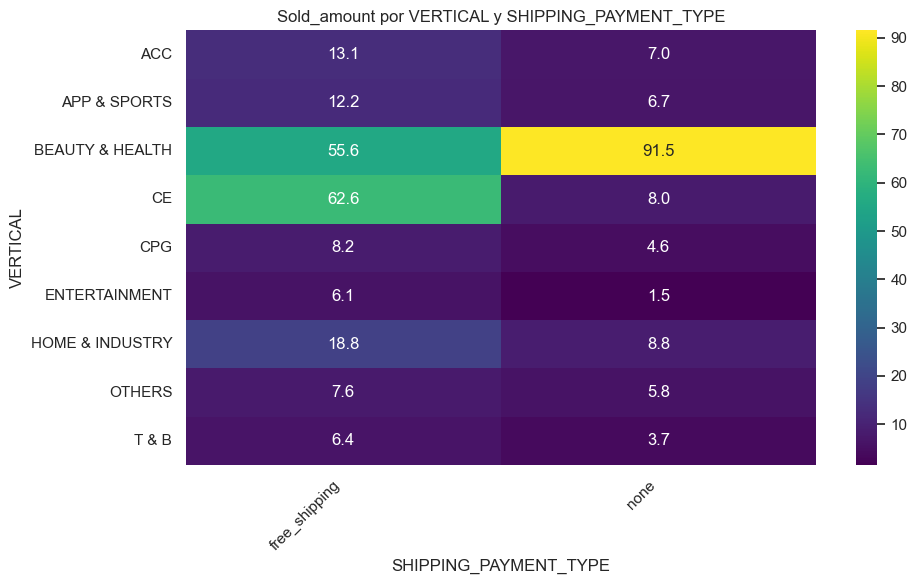

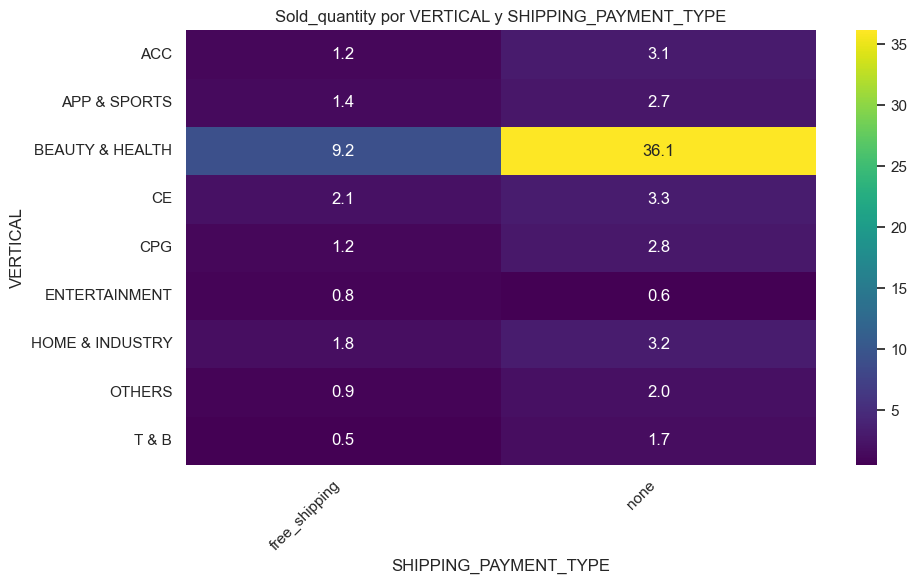

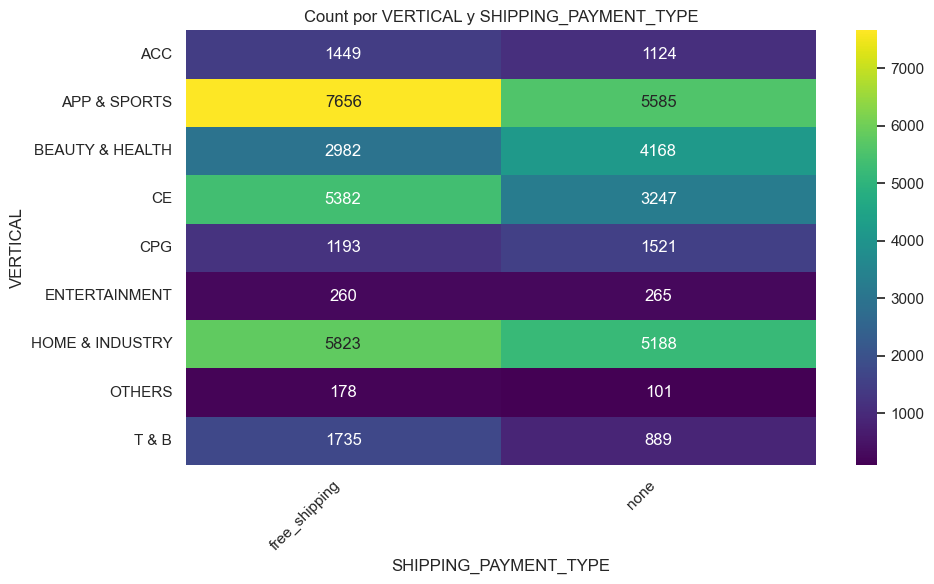

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas y métricas clave a analizar
categorical_pair = ('VERTICAL', 'SHIPPING_PAYMENT_TYPE')
metrics = ['SOLD_AMOUNT', 'SOLD_QUANTITY', 'count']

# Calcular métricas agrupadas por combinaciones de las categorías seleccionadas
grouped = df.groupby(list(categorical_pair)).agg(
    amount=('SOLD_AMOUNT', 'mean'),
    quantity=('SOLD_QUANTITY', 'mean'),
    count=('OFFER_START_DATE', 'size')
).reset_index()

# Crear gráficos de calor para cada métrica
for metric in metrics:
    if metric == 'SOLD_AMOUNT':
        pivot_table = grouped.pivot(index=categorical_pair[0], columns=categorical_pair[1], values='amount')
    elif metric == 'SOLD_QUANTITY':
        pivot_table = grouped.pivot(index=categorical_pair[0], columns=categorical_pair[1], values='quantity')
    elif metric == 'count':
        pivot_table = grouped.pivot(index=categorical_pair[0], columns=categorical_pair[1], values='count')
    
    # Graficar heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".1f" if metric != 'count' else ".0f", cmap='viridis', cbar=True)
    plt.title(f"{metric.capitalize()} por {categorical_pair[0]} y {categorical_pair[1]}")
    plt.xlabel(categorical_pair[1])
    plt.ylabel(categorical_pair[0])
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### Insights:

1. **Conteo**:
   - `APP & SPORTS` lidera en cantidad total de transacciones, especialmente con el método `free_shipping`.
   - Segmentos como `BEAUTY & HEALTH` y `HOME & INDUSTRY` también destacan, pero con diferencias menos marcadas entre métodos de envío.

2. **Ingresos (`Sold_amount`)**:
   - `BEAUTY & HEALTH` genera los ingresos más altos por transacción bajo el método `none` (91.5 en promedio).
   - Segmentos como `CE` mantienen ingresos consistentes entre métodos, mientras `ENTERTAINMENT` y `CPG` tienen ingresos bajos.

3. **Cantidad Vendida (`Sold_quantity`)**:
   - `BEAUTY & HEALTH` también lidera en cantidad bajo el método `none`.
   - Segmentos como `APP & SPORTS` y `HOME & INDUSTRY` muestran un equilibrio entre métodos pero con cantidades menores.

4. **General**:
   - `BEAUTY & HEALTH` destaca en ingresos y cantidades, asociado al método `none`, lo que podría indicar limitaciones en políticas de envío gratuito.
   - Segmentos como `APP & SPORTS` y `HOME & INDUSTRY` están más orientados al método `free_shipping`, probablemente por márgenes menores o mayor competencia.

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


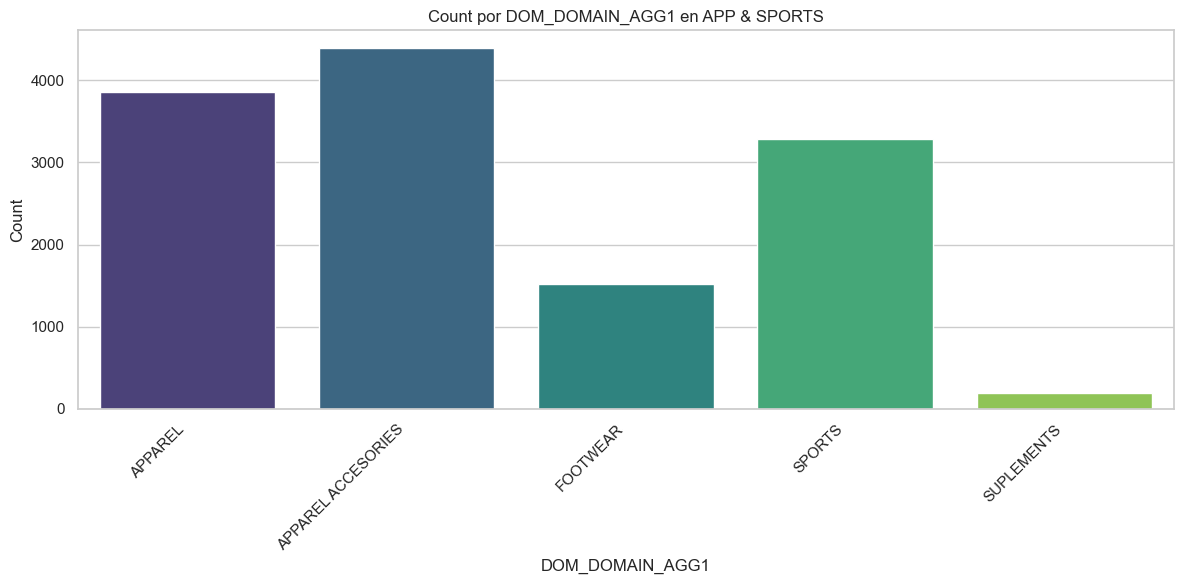

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


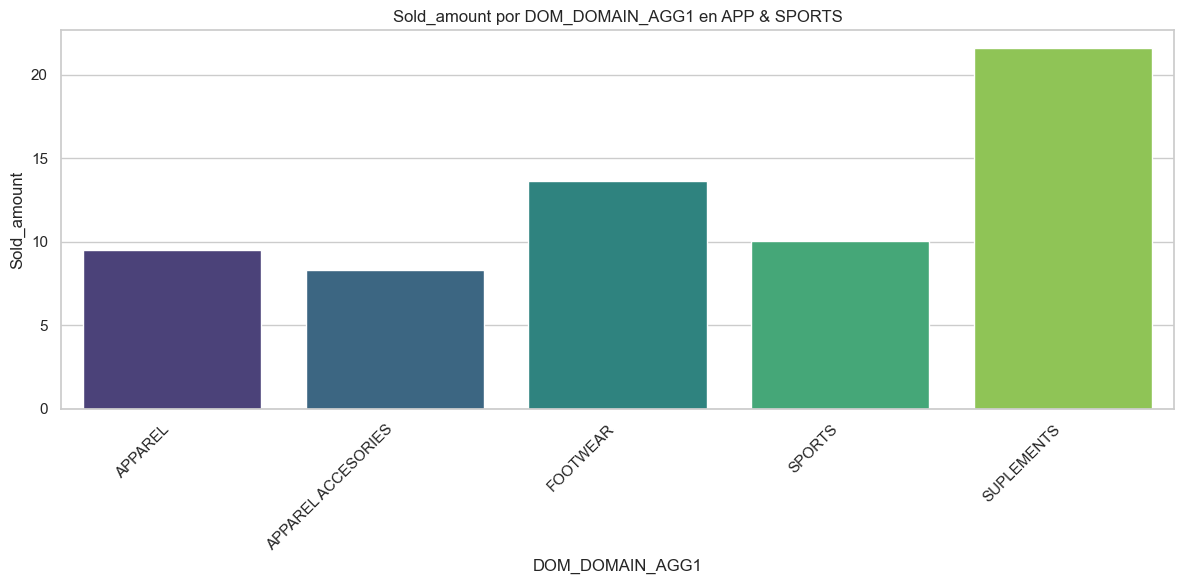

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


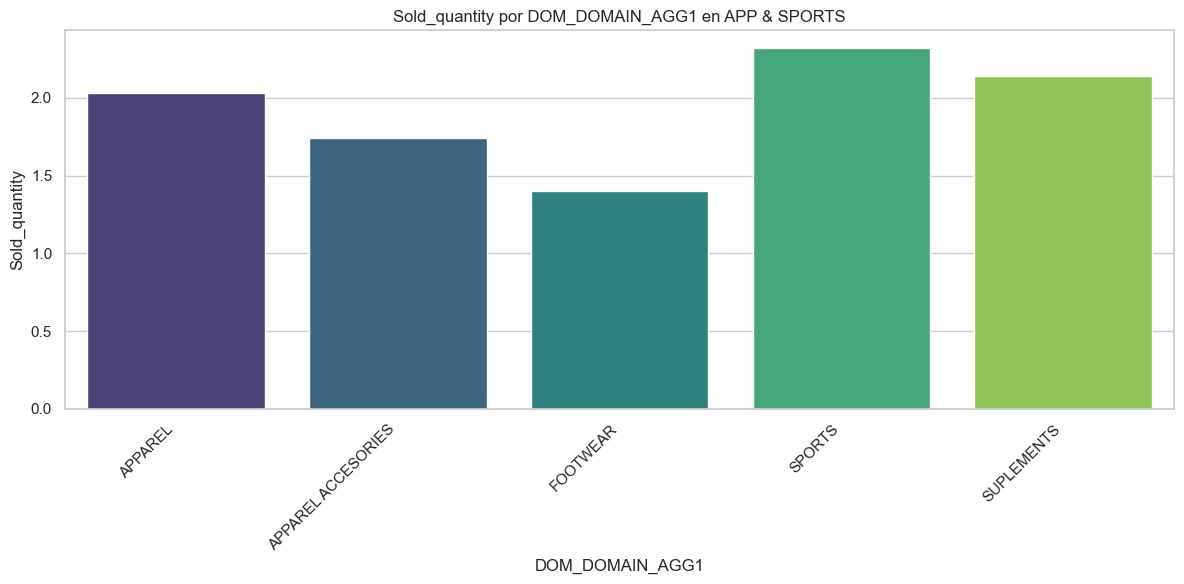

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


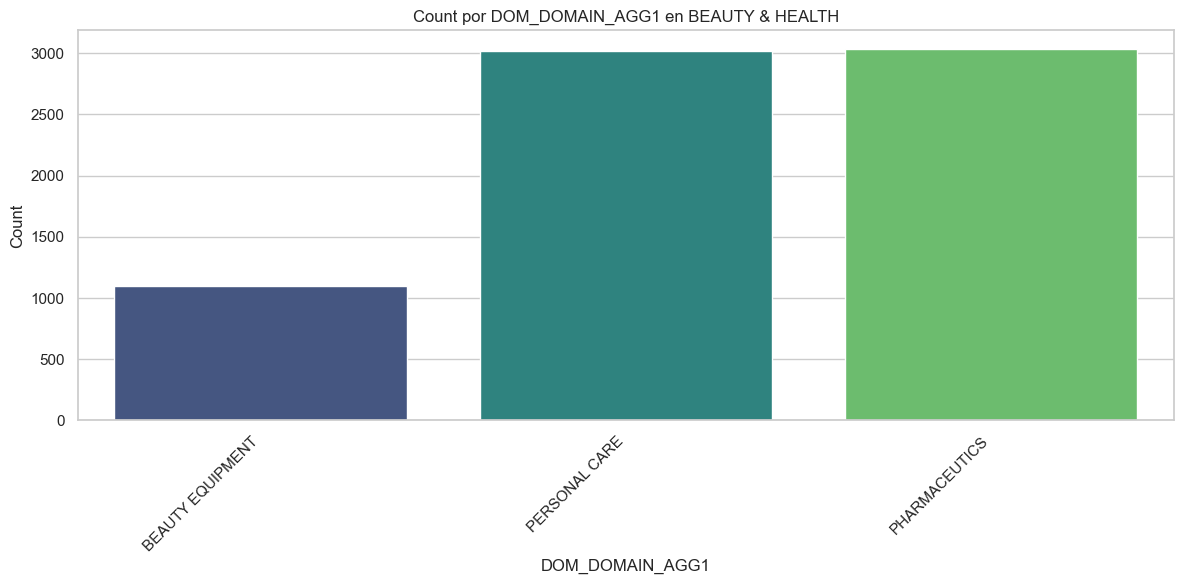

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


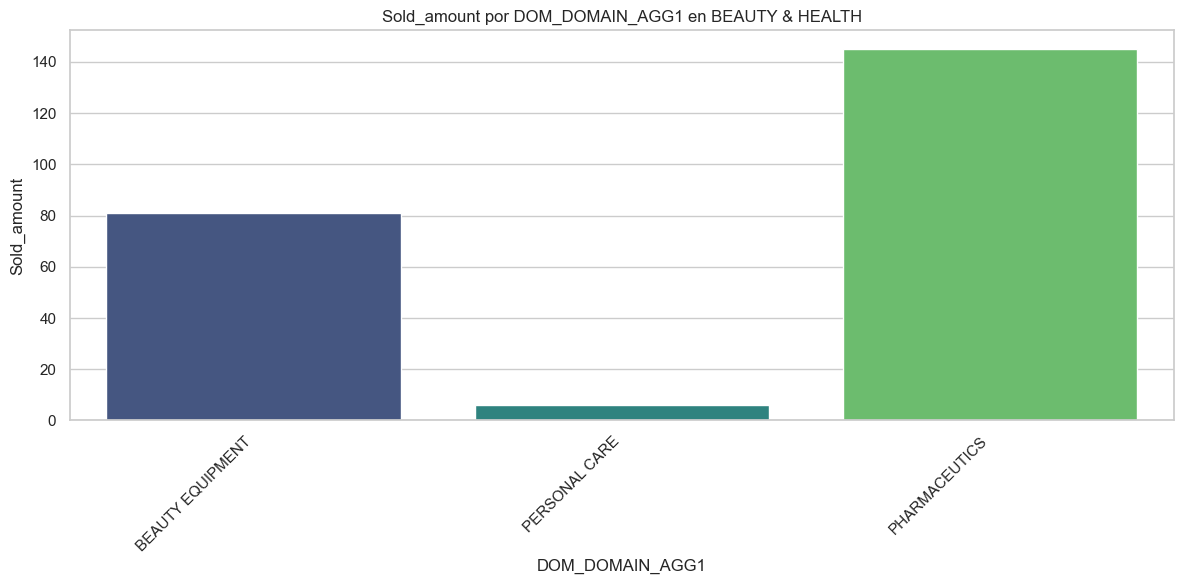

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


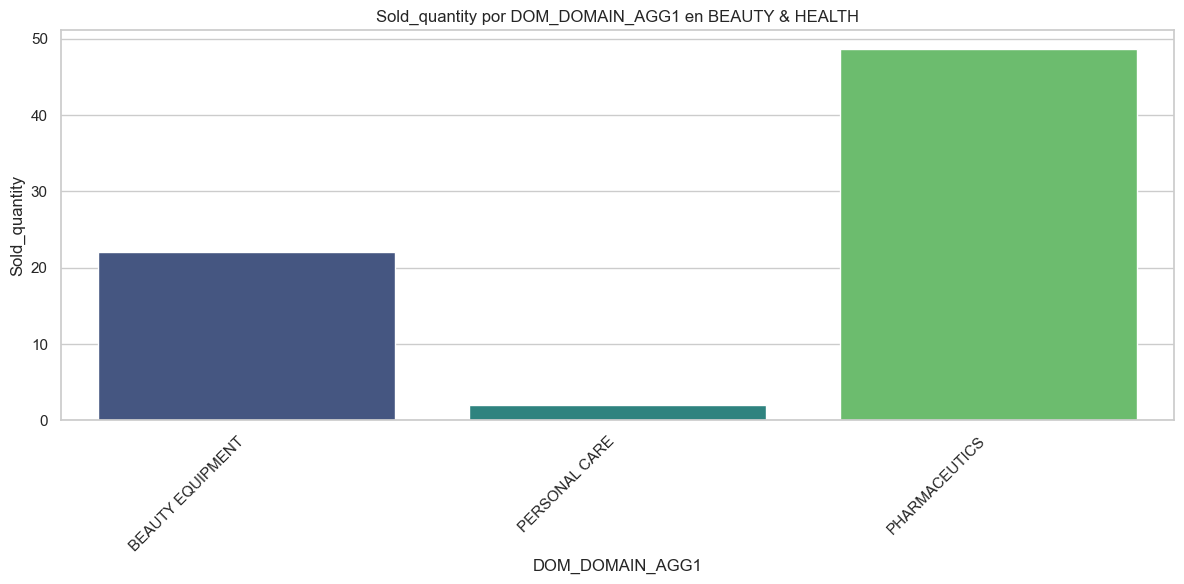

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


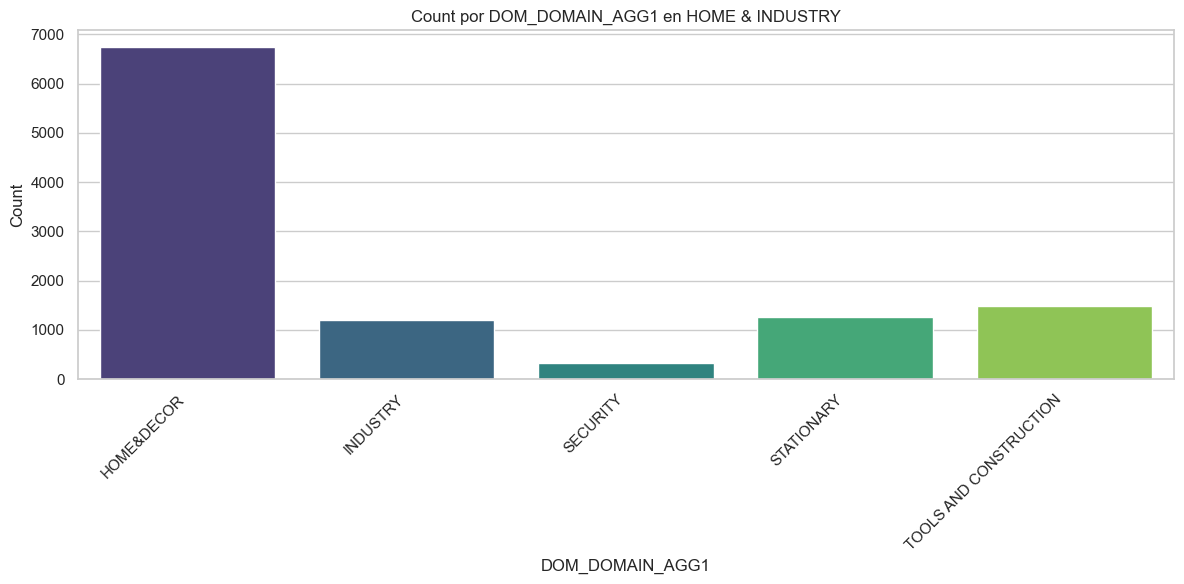

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


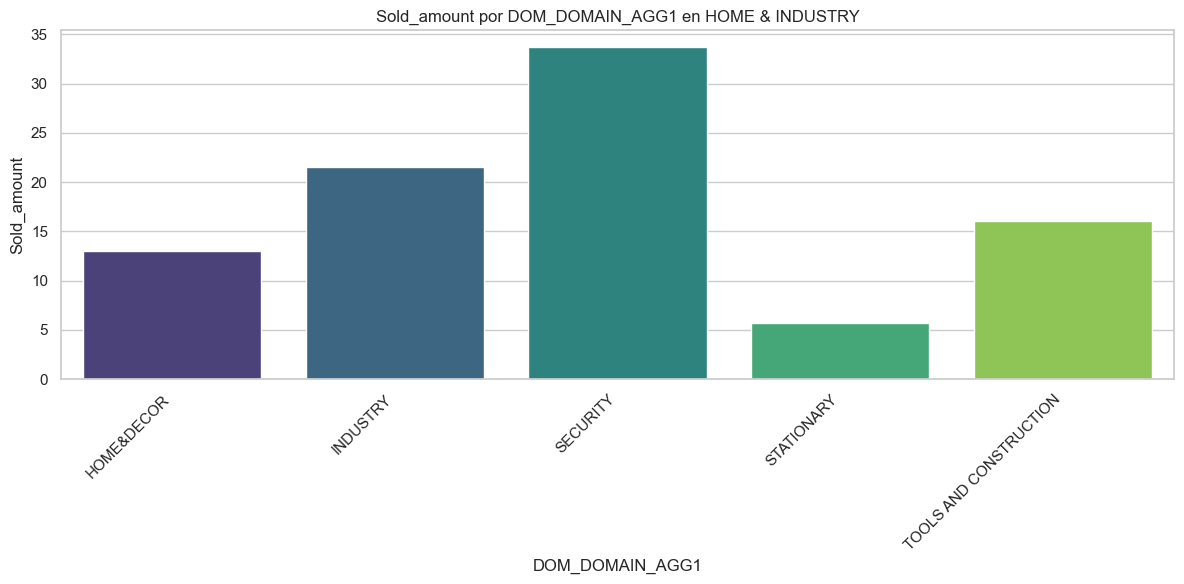

/var/folders/8q/86tnfc_95kndmtpftrzz7w2h0000gn/T/ipykernel_28563/3860897734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


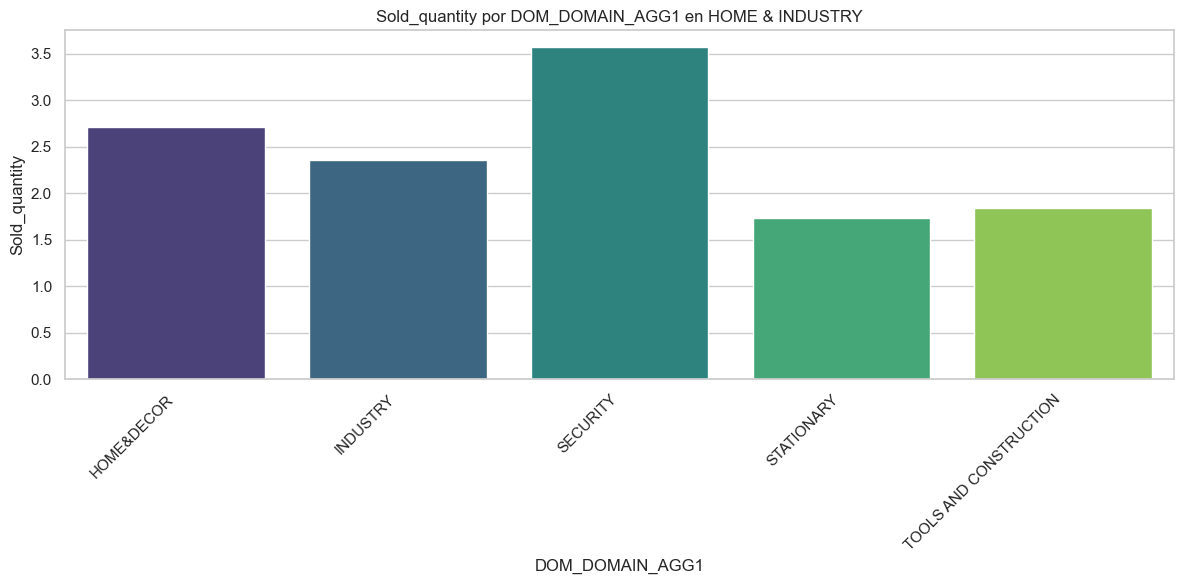

In [45]:
# Filtrar las verticales mayoritarias
major_verticals = ['APP & SPORTS', 'BEAUTY & HEALTH', 'HOME & INDUSTRY']
filtered_df = df[df['VERTICAL'].isin(major_verticals)]

# Loop para generar gráficos para cada vertical
for vertical in major_verticals:
    vertical_df = filtered_df[filtered_df['VERTICAL'] == vertical]

    # Agrupar datos por DOM_DOMAIN_AGG1
    grouped = vertical_df.groupby('DOM_DOMAIN_AGG1').agg(
        count=('DOM_DOMAIN_AGG1', 'size'),
        sold_amount=('SOLD_AMOUNT', 'mean'),
        sold_quantity=('SOLD_QUANTITY', 'mean')
    ).reset_index()

    # Graficar para cada métrica
    metrics = ['count', 'sold_amount', 'sold_quantity']
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(
            data=grouped,
            x='DOM_DOMAIN_AGG1',
            y=metric,
            palette=sns.color_palette('viridis', n_colors=len(grouped))
        )
        plt.title(f'{metric.capitalize()} por DOM_DOMAIN_AGG1 en {vertical}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric.capitalize())
        plt.xlabel('DOM_DOMAIN_AGG1')
        plt.tight_layout()
        plt.show()

In [46]:
import pandas as pd
from IPython.display import display

# Filtrar las verticales mayoritarias
major_verticals = ['APP & SPORTS', 'BEAUTY & HEALTH', 'HOME & INDUSTRY']
filtered_df = df[df['VERTICAL'].isin(major_verticals)]

# Crear tablas para cada vertical
tables = {}
for vertical in major_verticals:
    vertical_df = filtered_df[filtered_df['VERTICAL'] == vertical]

    # Agrupar datos por DOM_DOMAIN_AGG1
    grouped = vertical_df.groupby('DOM_DOMAIN_AGG1').agg(
        count=('DOM_DOMAIN_AGG1', 'size'),
        sold_amount=('SOLD_AMOUNT', 'mean'),
        sold_quantity=('SOLD_QUANTITY', 'mean')
    ).reset_index()

    # Añadir tabla al diccionario
    tables[vertical] = grouped

    # Mostrar la tabla
    print(f"Tabla para {vertical}:")
    display(grouped)

Tabla para APP & SPORTS:


,DOM_DOMAIN_AGG1,count,sold_amount,sold_quantity
0,APPAREL,3856,9.483895,2.034492
1,APPAREL ACCESORIES,4387,8.334997,1.744700
2,FOOTWEAR,1516,13.644927,1.398417
3,SPORTS,3289,10.069535,2.318638
4,SUPLEMENTS,193,21.561762,2.139896


Tabla para BEAUTY & HEALTH:


,DOM_DOMAIN_AGG1,count,sold_amount,sold_quantity
0,BEAUTY EQUIPMENT,1099,80.828253,22.111010
1,PERSONAL CARE,3016,6.094257,2.037135
2,PHARMACEUTICS,3035,145.046702,48.664580


Tabla para HOME & INDUSTRY:


,DOM_DOMAIN_AGG1,count,sold_amount,sold_quantity
0,HOME&DECOR,6742,13.017154,2.709730
1,INDUSTRY,1199,21.579833,2.361134
2,SECURITY,320,33.716656,3.571875
3,STATIONARY,1259,5.651930,1.729944
4,TOOLS AND CONSTRUCTION,1491,16.081623,1.837693


### Insights por Verticales

1. **APP & SPORTS**:
   - **`FOOTWEAR`** tiene el mayor promedio de `sold_amount` (13.64) pero la menor `sold_quantity` (1.39).
   - **`SUPLEMENTS`** destaca con un `sold_amount` alto (21.56) y una cantidad moderada (`sold_quantity` de 2.13).
   - **`APPAREL` y `APPAREL ACCESORIES`** tienen más registros pero valores menores de `sold_amount` y `sold_quantity`.

2. **BEAUTY & HEALTH**:
   - **`PHARMACEUTICS`** lidera con un promedio de `sold_amount` (145.04) y `sold_quantity` (48.66), indicando productos premium.
   - **`BEAUTY EQUIPMENT`** tiene un `sold_amount` elevado (80.82) pero menor `sold_quantity` (22.11).
   - **`PERSONAL CARE`** muestra el menor `sold_amount` (6.09) pero un alto número de registros (3016), indicando productos más accesibles.

3. **HOME & INDUSTRY**:
   - **`HOME&DECOR`** domina en cantidad de registros (6742) con valores moderados de `sold_amount` (13.01) y `sold_quantity` (2.70).
   - **`SECURITY`** tiene el mayor `sold_amount` (33.71) y `sold_quantity` (3.57), indicando productos especializados.
   - **`TOOLS AND CONSTRUCTION`** equilibra un `sold_amount` alto (16.08) con una `sold_quantity` moderada (1.83).

**Conclusión:** Categorías con mayor `sold_amount` tienden a tener menor `sold_quantity`, indicando productos premium o especializados, mientras que categorías con más registros suelen ser más accesibles.